In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def generate_points(n=10):
    return pd.DataFrame(np.random.randint(-100, 100, size=(10, 2)), columns=['x', 'y'])

def sort_by_x(df): # TODO: Does sorting by y for both bottom and top hulls?
    return df.sort_values(['x', 'y'], ascending=(True, True)).reset_index(drop=True)

def sort_by_y(df): # TODO: Does sorting by y for both bottom and top hulls?
    return df.sort_values(['y', 'x'], ascending=(True, True)).reset_index(drop=True)

def get_upper_and_lower_sets(numpy_array):
    lowest_x_element = numpy_array[0]
    return np.sort(numpy_array, order=['y'])

def is_not_right_turn(data):
    if len(data) != 3:
        raise ValueError("Not enough values to determine turn direction")

    px, py = data[0]
    qx, qy = data[1]
    rx, ry = data[2]

    checker_array = np.array(
        [[1, px, py],
        [1, qx, qy],
        [1, rx, ry]]
    )

    return np.linalg.det(checker_array) <= 0

def plot_list(data, circle_back=False, scatter_overlay=None):
    if circle_back:
        for index, point in enumerate(data):
            if index == len(data) - 1:
                next_point = data[0]
            else:
                next_point = data[index + 1]
            plt.plot([point[0], next_point[0]], [point[1], next_point[1]], 'ro-')
    else:
        for index, point in enumerate(data[:-1]):
            next_point = data[index + 1]
            plt.plot([point[0], next_point[0]], [point[1], next_point[1]], 'ro-')

    if scatter_overlay is not None:
        plt.scatter(scatter_overlay['x'], scatter_overlay['y'])
    plt.show()

# Variable initialization

In [4]:
n = 10
sample_points = generate_points(n)
sample_points_sorted_x = sort_by_x(sample_points)

upper_list = [tuple(point) for point in sample_points_sorted_x.head(2).to_numpy()]
lower_list = [tuple(point) for point in sample_points_sorted_x.tail(2).to_numpy()]
lower_list.reverse()

print("Sample Points Generated")
print(sample_points)
print("Sample Points X Sorted")
print(sample_points_sorted_x)
print("Upper List Initialized")
print(upper_list)
print("Lower List Initialized")
print(lower_list)

Sample Points Generated
    x   y
0  79 -81
1  82   9
2  98 -87
3  26 -21
4  72 -23
5   5  38
6 -70  38
7 -58 -72
8  40 -56
9 -75 -28
Sample Points X Sorted
    x   y
0 -75 -28
1 -70  38
2 -58 -72
3   5  38
4  26 -21
5  40 -56
6  72 -23
7  79 -81
8  82   9
9  98 -87
Upper List Initialized
[(-75, -28), (-70, 38)]
Lower List Initialized
[(98, -87), (82, 9)]


In [5]:
upper_list = [tuple(point) for point in sample_points_sorted_x.head(2).to_numpy()]
lower_list = [tuple(point) for point in sample_points_sorted_x.tail(2).to_numpy()]
lower_list.reverse()

# Convex hull algorithm implementation

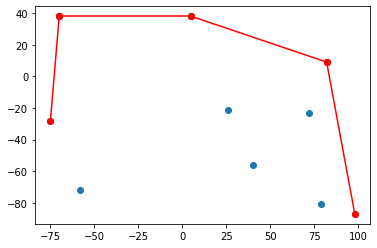

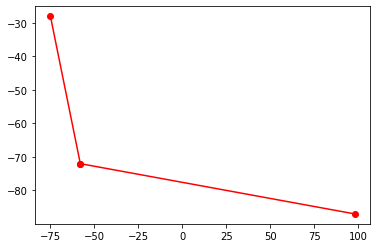

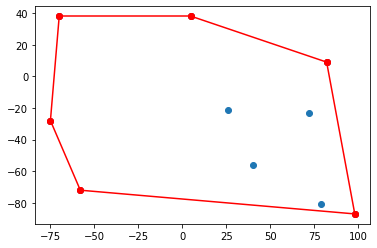

In [6]:
plt.scatter(sample_points['x'], sample_points['y'])

# Create Upper Hull
for index in range(2, n):
    # print(upper_list)
    point_to_add = tuple(sample_points_sorted_x.iloc[index].to_numpy())
    upper_list.append(point_to_add)
    # print(point_to_add)
    while len(upper_list) > 2 and not is_not_right_turn(upper_list[-3:]):
        # print('opposite turn condition reached')
        del upper_list[-2]

plot_list(upper_list, circle_back=False)

# Create Lower Hull
for index in range(n-3, -1, -1):
    # print(upper_list)
    point_to_add = tuple(sample_points_sorted_x.iloc[index].to_numpy())
    lower_list.append(point_to_add)
    # print(point_to_add)
    while len(lower_list) > 2 and not is_not_right_turn(lower_list[-3:]):
        # print('opposite turn condition reached')
        del lower_list[-2]

plot_list(lower_list, circle_back=False)

del lower_list[-1]
del lower_list[0]

solution = upper_list + lower_list
plot_list(solution, circle_back=True, scatter_overlay=sample_points)